In [8]:
%load_ext autoreload
%autoreload 2
%cd ~/PonyPricer/
%matplotlib inline
%run scrape2sql.py

import re
import math
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.cross_validation import train_test_split
from sklearn.cross_validation import KFold
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn import linear_model
from sklearn import isotonic
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from model import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/jbrosamer/PonyPricer
opening /Users/jbrosamer/PonyPricer/WarmbloodData/WarmbloodId0To1000.p
opening /Users/jbrosamer/PonyPricer/WarmbloodData/WarmbloodId1000To2000.p
opening /Users/jbrosamer/PonyPricer/WarmbloodData/WarmbloodId2000To3000.p
{'lnprice': 'REAL', 'warmblood': 'BOOLEAN', 'temp': 'INTEGER', 'zip': 'VARCHAR(50)', 'color': 'VARCHAR(50)', 'gender': 'VARCHAR(50)', 'age': 'REAL', 'breed': 'VARCHAR(50)', 'registered': 'VARCHAR(50)', 'id': 'INTEGER', 'skills': 'VARCHAR(50)', 'inches': 'VARCHAR(50)', 'sold': 'BOOLEAN', 'forlease': 'BOOLEAN', 'forsale': 'VARCHAR(50)', 'soldhere': 'BOOLEAN', 'price': 'REAL'}
WarmbloodAds



In [14]:
df_test = all_data()
df = df_test.copy()
df = clean_col(df)
df = encode(df)

len(df)

df.columns Index([u'id', u'breed', u'price', u'color', u'age', u'zip', u'temp',
       u'warmblood', u'sold', u'soldhere', u'forsale', u'forlease',
       u'registered', u'skills', u'gender', u'inches', u'lnprice'],
      dtype='object')


ValueError: invalid literal for long() with base 10: 'German Warmblood'

Abs Median Error: 5775.67263389
Abs Percent Error: 0.460307257631
Mean RMSE: 14170.8628923


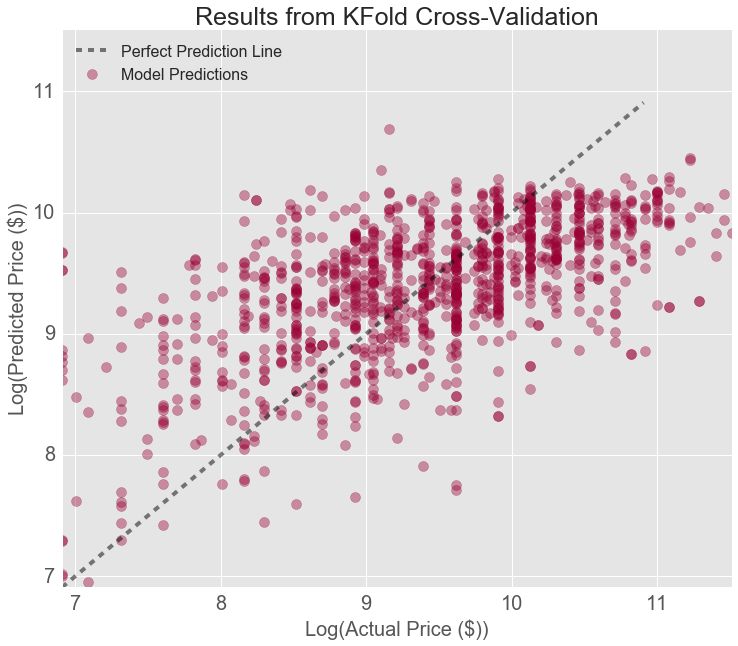

In [12]:
params_gbr = {'loss': 'ls'}
b = Model(df, params = params_gbr)
b.split()
b.kfold_cv(n_folds=10)
b.plot_results()

Feature ranking:
1. feature 4 (0.338015)
2. feature 0 (0.318285)
3. feature 2 (0.184261)
4. feature 3 (0.122922)
5. feature 1 (0.036516)


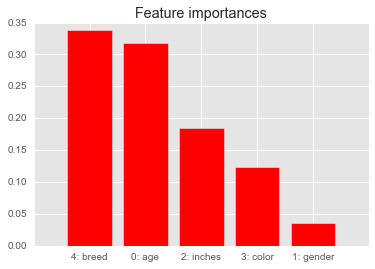

In [13]:
gbr=b.makeModel()
importances = gbr.feature_importances_
# std = np.std([tree.feature_importances_ for tree in gbr.estimators_],
#              axis=0)
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

for f in range(b.X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))
featNames=final_cols
# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
xvals=range(b.X.shape[1])
plt.bar(range(b.X.shape[1]), importances[indices],
       color="r", align="center")
xlbl=["%i: %s"%(x, featNames[x]) for x in indices]

plt.xticks(range(b.X.shape[1]), xlbl)
plt.xlim([-1, b.X.shape[1]])
plt.show()

df.columns Index([u'id', u'breed', u'price', u'color', u'age', u'zip', u'temp',
       u'warmblood', u'sold', u'soldhere', u'forsale', u'forlease',
       u'registered', u'skills', u'gender', u'inches', u'lnprice'],
      dtype='object')


/Users/jbrosamer/miniconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


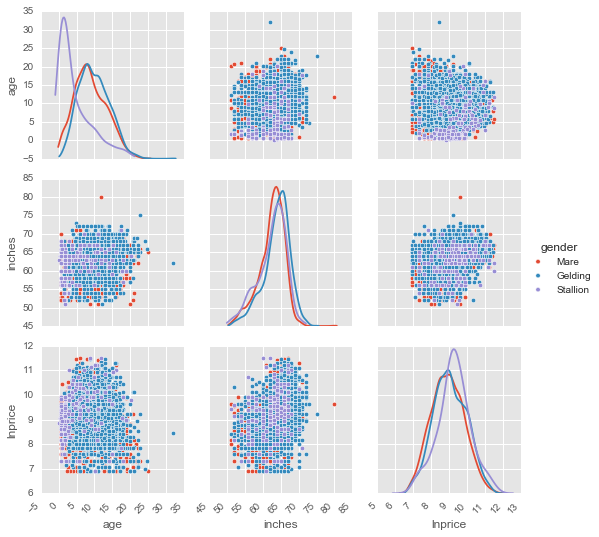

In [5]:

plt.style.use('ggplot')
df = df_test.copy()
df = clean_col(df)
idx = df.loc[df['price']>100000,:].index
#df = df.drop(idx, axis = 0)
df_temp = df[['age','inches', 'gender', 'lnprice']]
plot = sns.pairplot(df_temp, hue = 'gender', diag_kind='kde')
for ax in plot.axes.flat:
    plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, horizontalalignment='right')

In [6]:
pr=df_test.groupby(['breed'])['price']

In [7]:
pr[0]

NotImplementedError: Not implemented: 0